In [89]:
#initialization
import numpy as np
import matplotlib.pyplot as plt
import math

# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [103]:
# Crear un registro cuántico de entrada con 1 qubits
q_input = QuantumRegister(1, 'in')

# Crear un registro cuántico de salida con 4 qubits
q_output = QuantumRegister(3, 'out')

# Crear un registro clásico para medir los qubits de salida con 4 bits
c_output = ClassicalRegister(4, 'c_output')

# Crear el circuito cuántico con los registros definidos
qc = QuantumCircuit(q_output, q_input, c_output)

In [104]:
def init(qc, reg_in, angle):
  # Convertir -135 grados a radianes
  angle = angle * math.pi / 180

  # Aplicar la rotación en Y a cada qubit en q_in con el ángulo dado
  for qubit in reg_in:
      qc.ry(angle, qubit)

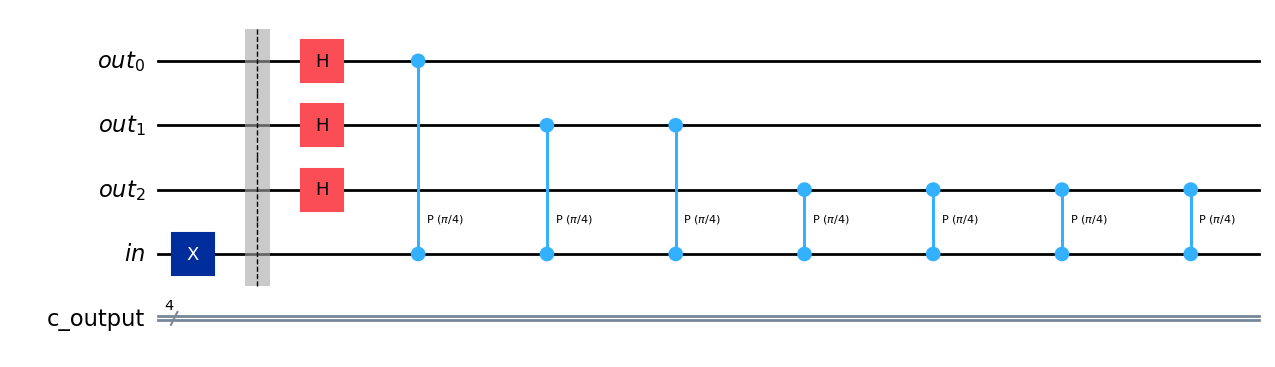

In [105]:
qc.x(q_input[0])
qc.barrier()
for qubit in range(3):
    qc.h(qubit)

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qc.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2

qc.draw('mpl')

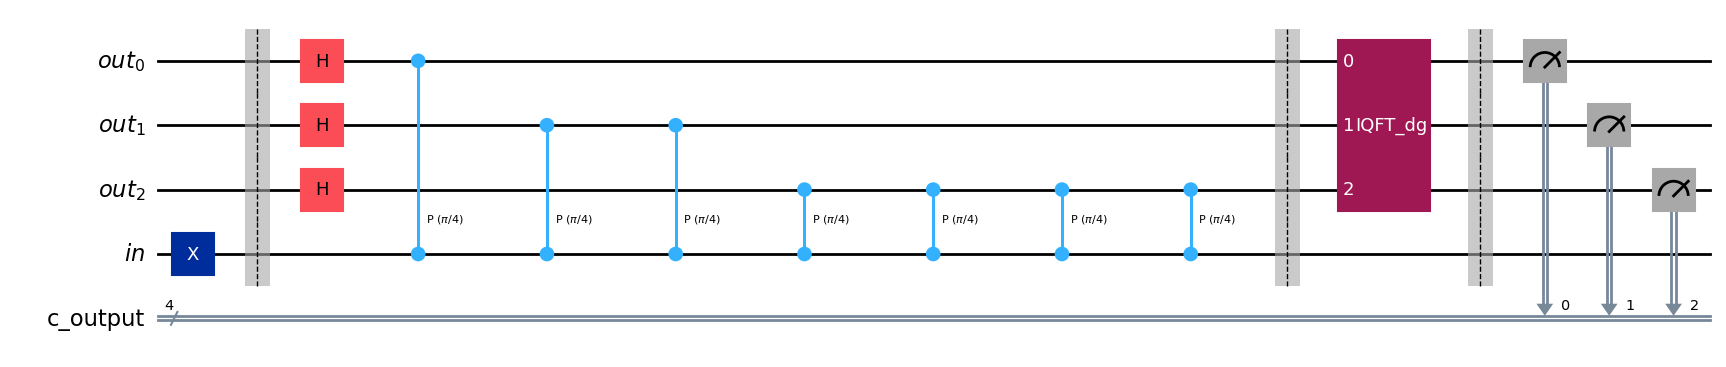

In [106]:
qc.barrier()
# Apply inverse QFT
qc = qc.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qc.barrier()
for n in range(3):
    qc.measure(n,n)

qc.draw('mpl')

In [108]:
simulator = Aer.get_backend('qasm_simulator')

# Compilar y ensamblar el circuito cuántico
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2048)

result = job.result()
counts = result.get_counts(qc)
print(counts)


{'0001': 2048}


/tmp/ipykernel_1413734/4090484463.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 1, color='lightgray', fill=True, edgecolor='black')


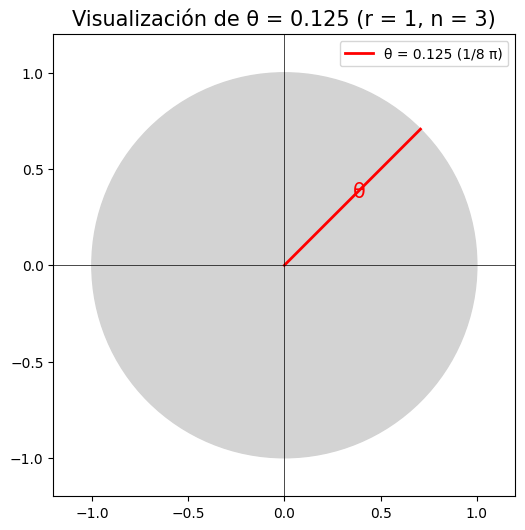

In [124]:
# Parámetros
r = 1
n = 3
theta = r / (2 ** n)  # θ = 1/8

# Crear el gráfico de un círculo
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar el círculo completo
circle = plt.Circle((0, 0), 1, color='lightgray', fill=True, edgecolor='black')
ax.add_artist(circle)

# Dibujar la fracción correspondiente a theta
angle = 2 * np.pi * theta  # Convertir θ a radianes (fracción de 2π)

# Crear el gráfico para θ
ax.plot([0, np.cos(angle)], [0, np.sin(angle)], color='red', linewidth=2, label=f"θ = {theta} ({r}/{2**n} \u03C0)")

# Añadir detalles visuales
ax.text(np.cos(angle) / 2, np.sin(angle) / 2, 'θ', fontsize=15, color='red')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.set_aspect('equal', 'box')

# Añadir etiquetas
plt.title(f"Visualización de θ = {theta} (r = {r}, n = {n})", fontsize=15)
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


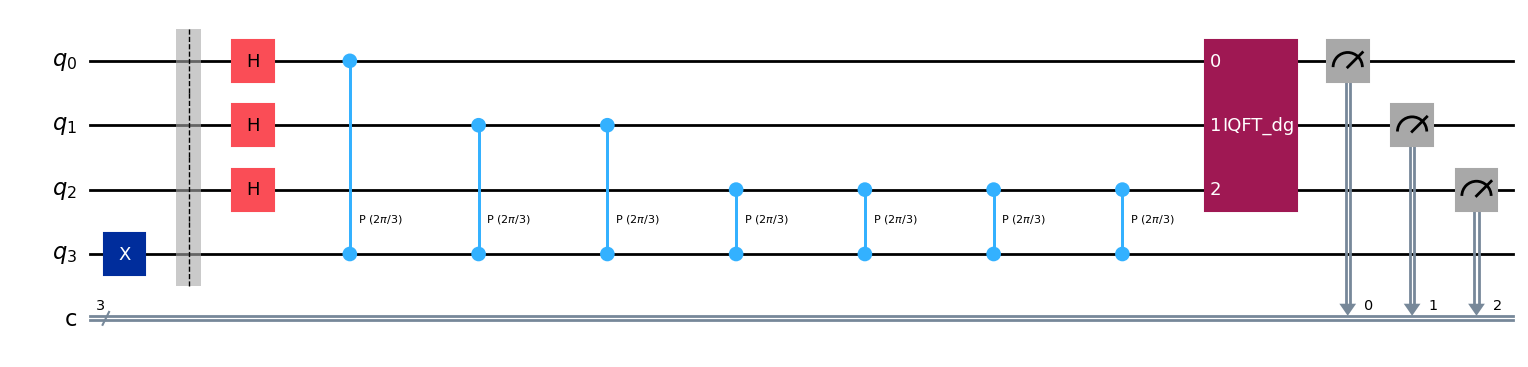

In [110]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Prepare our eigenstate |psi>:
qpe2.x(3)
 #init(qpe2, 3, -135)
qpe2.barrier()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qpe2 = qpe2.compose(QFT(3, inverse=True), [0,1,2])

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw('mpl')

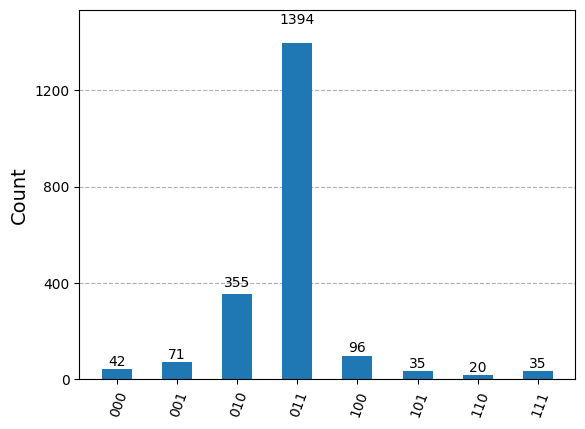

In [112]:
aer_sim = Aer.get_backend('qasm_simulator')
shots = 2048
t_qpe = transpile(qpe2, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

El resultado esperad es 0.3333..... Vemos que la respuesta es 010 = 2 y 011 = 3. Para calcular el

theta = r/(2^n)

n = Qubits de salida = 3

r = 010 = 2 => theta = 2/(2^3) = 2/8 = 0.25

r = 011 = 3 => theta = 3/(2^3) = 3/8 = 0.375

Para obtener más precisión agregamos más qubits. Probemos con n = 5

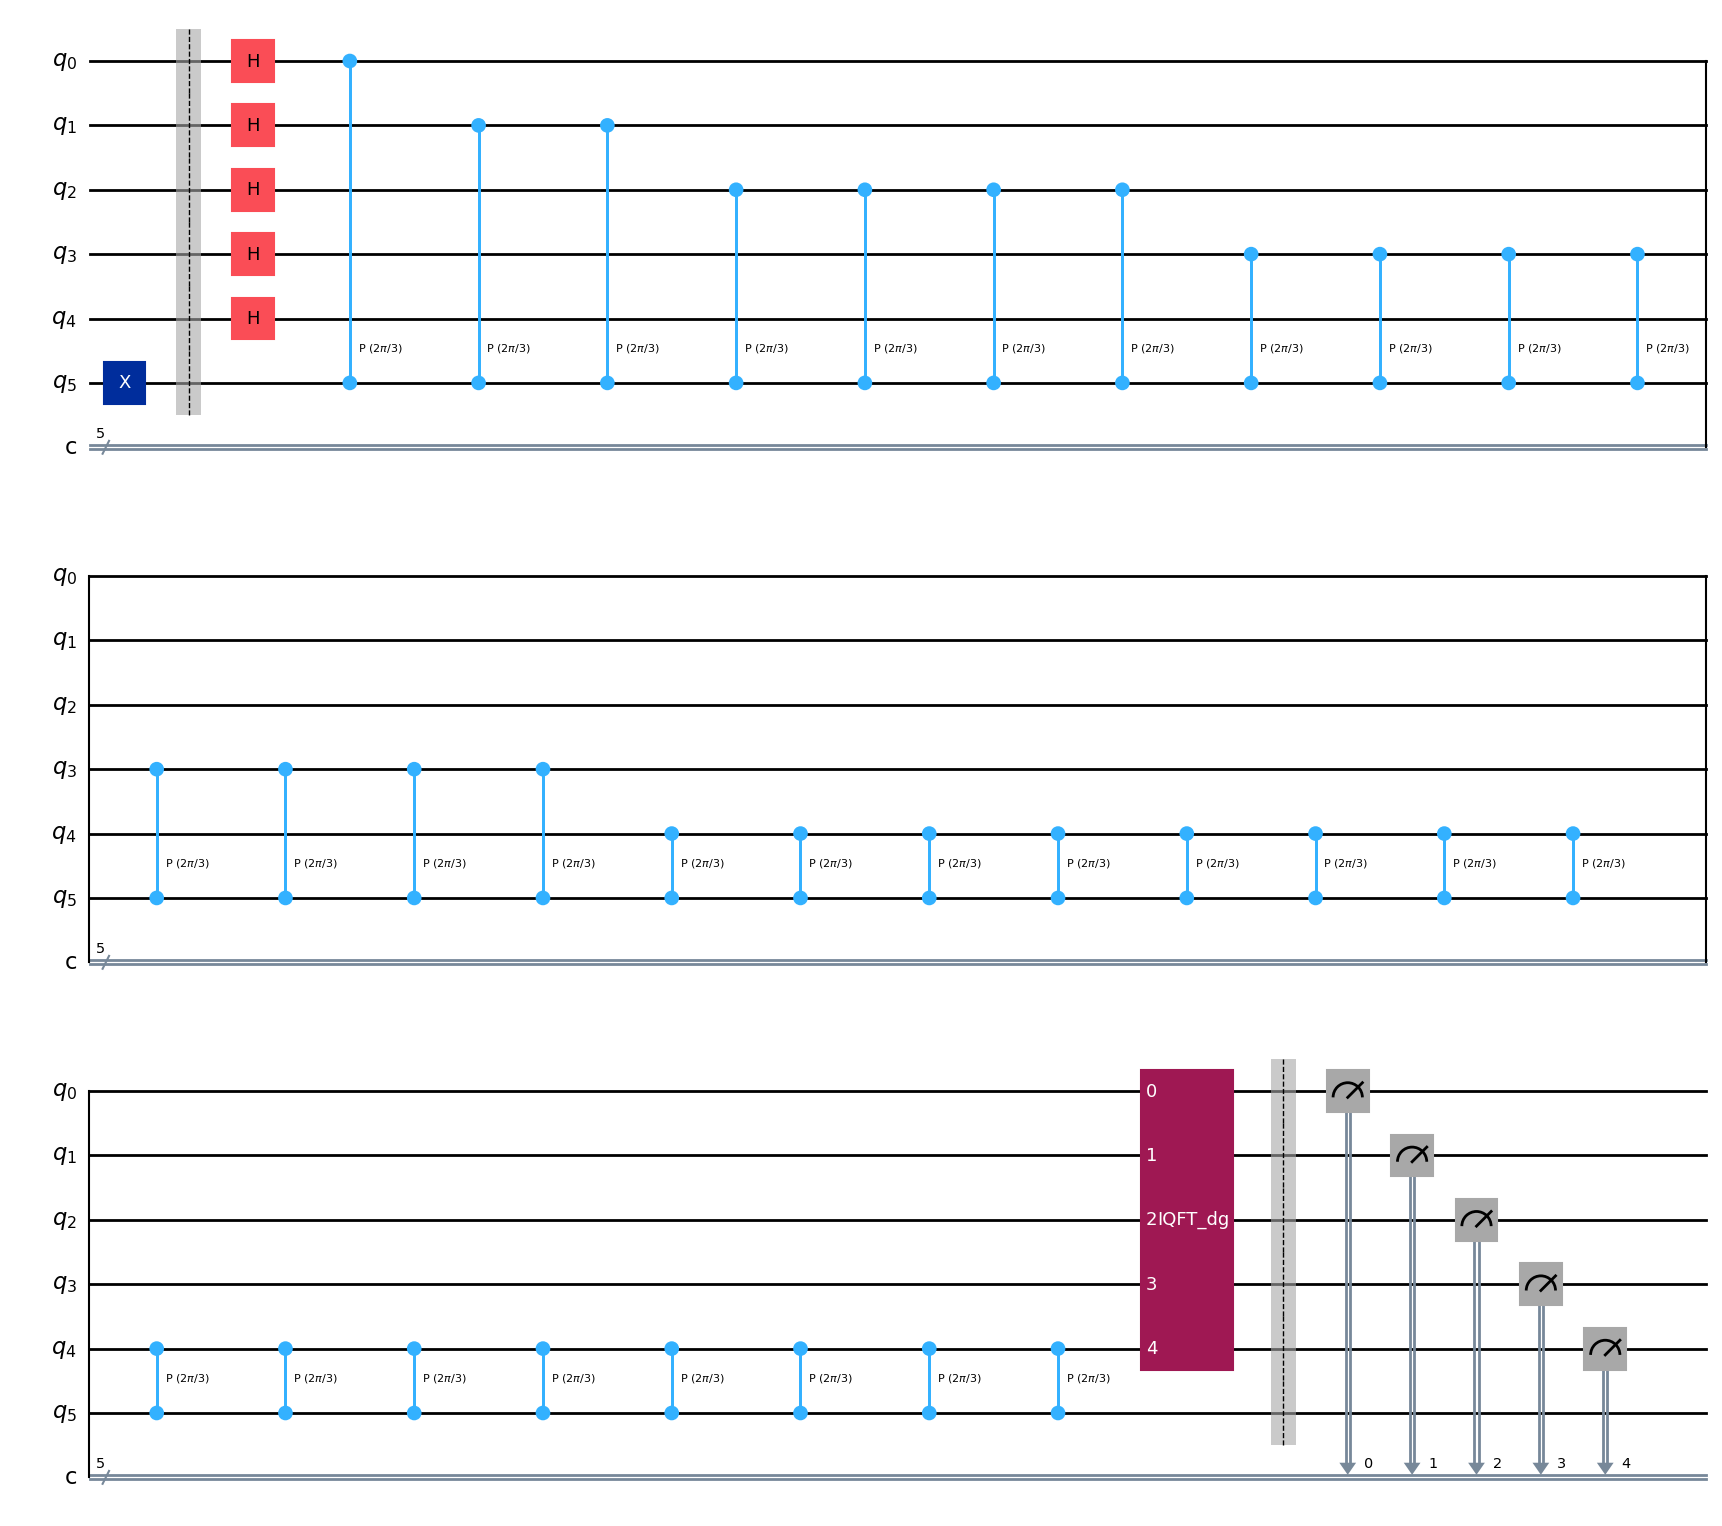

In [113]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Prepare our eigenstate |psi>:
qpe3.x(5)
qpe3.barrier()

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw('mpl')

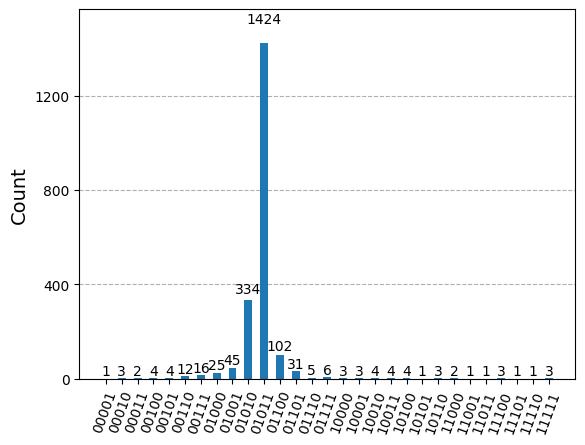

In [115]:
# Let's see the results!
aer_sim = Aer.get_backend('qasm_simulator')
shots = 2048
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Recordemos que el resultados esperado 0.33333

Los resultados más probables son ahora 01011 (decimal 11) y 01010 (decimal 10). Para calcular el

theta = r/(2^n)

n = Qubits de salida = 5

r = 01010 = 10 => theta = 10/(2^5) = 10/32 = 0.3125

r = 01011 = 11 => theta = 11/(2^5) = 11/32 = 0.34375

Nos acercamos en precisión

/tmp/ipykernel_1413734/2496437992.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 1, color='lightgray', fill=True, edgecolor='black')


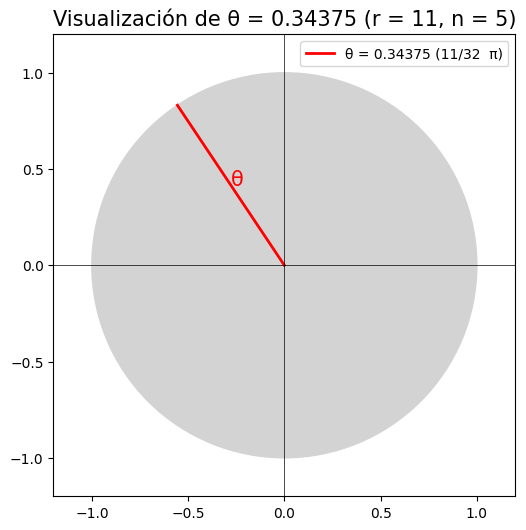

In [125]:
# Parámetros
r = 11
n = 5
theta = r / (2 ** n)  

# Crear el gráfico de un círculo
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar el círculo completo
circle = plt.Circle((0, 0), 1, color='lightgray', fill=True, edgecolor='black')
ax.add_artist(circle)

# Dibujar la fracción correspondiente a theta
angle = 2 * np.pi * theta  # Convertir θ a radianes (fracción de 2π)

# Crear el gráfico para θ
ax.plot([0, np.cos(angle)], [0, np.sin(angle)], color='red', linewidth=2, label=f"θ = {theta} ({r}/{2 ** n}  \u03C0)")

# Añadir detalles visuales
ax.text(np.cos(angle) / 2, np.sin(angle) / 2, 'θ', fontsize=15, color='red')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.set_aspect('equal', 'box')

# Añadir etiquetas
plt.title(f"Visualización de θ = {theta} (r = {r}, n = {n})", fontsize=15)
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


Para entender cómo usar el "phase estimation" en el algoritmo de Shor tenemos que ver cómo alcular el período de la función Mod

In [126]:
def find_period_classical(x, N):
    n = 1
    t = x
    print(f"Para el paso:{n}-> {n}X{x} = {t}")
    while t != 1:
        #t *= x
        #t %= N
        t_ant = t
        t = np.mod(t*x, N)
        n += 1
        
        print(f"Para el paso:{n}-> {t_ant}X{x} = {t}")

    return n

In [129]:
def find_period_ext(x, N, x_max):
    n = 1
    periodo = 0
    t = x
    y_val = []
    y_val.append(t)

    print(f"Para el paso:{n}-> {n}X{x} = {t}")
    while n < x_max:
        #t *= x
        #t %= N
        t_ant = t
        t = np.mod(t*x, N)
        y_val.append(t)
        n += 1
        if (t == 1 and periodo == 0):
            periodo = n
        print(f"Para el paso:{n}-> {t_ant}X{x} = {t}")
    return periodo, y_val

In [132]:
a = 3
N = 35
x_max = 25
periodo, y_val = find_period_ext(a, N, x_max)

Para el paso:1-> 1X3 = 3
Para el paso:2-> 3X3 = 9
Para el paso:3-> 9X3 = 27
Para el paso:4-> 27X3 = 11
Para el paso:5-> 11X3 = 33
Para el paso:6-> 33X3 = 29
Para el paso:7-> 29X3 = 17
Para el paso:8-> 17X3 = 16
Para el paso:9-> 16X3 = 13
Para el paso:10-> 13X3 = 4
Para el paso:11-> 4X3 = 12
Para el paso:12-> 12X3 = 1
Para el paso:13-> 1X3 = 3
Para el paso:14-> 3X3 = 9
Para el paso:15-> 9X3 = 27
Para el paso:16-> 27X3 = 11
Para el paso:17-> 11X3 = 33
Para el paso:18-> 33X3 = 29
Para el paso:19-> 29X3 = 17
Para el paso:20-> 17X3 = 16
Para el paso:21-> 16X3 = 13
Para el paso:22-> 13X3 = 4
Para el paso:23-> 4X3 = 12
Para el paso:24-> 12X3 = 1
Para el paso:25-> 1X3 = 3


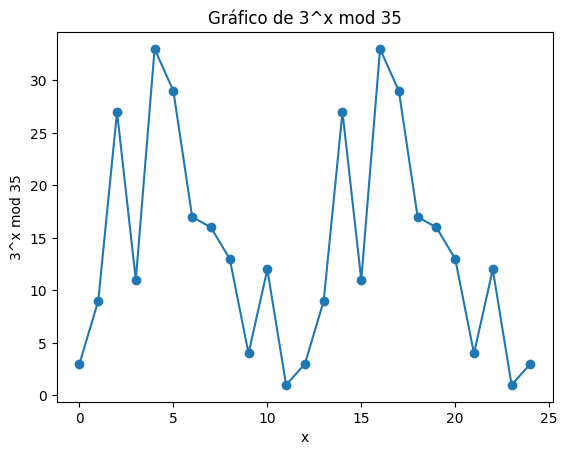

In [133]:
plt.plot(y_val,  marker='o', linestyle='-')
plt.xlabel('x')

plt.ylabel(f'{a}^x mod {N}')
plt.title(f'Gráfico de {a}^x mod {N}')
plt.show()

In [134]:
print(f"Periodo de la Fórmula= {periodo}")

Periodo de la Fórmula= 12


In [135]:
import math
import random

def shors_algorithm_classical(N):
    x = random.randint(0,N) # step one
    if(math.gcd(x,N) != 1): # step two
        return x,0,math.gcd(x,N),N/math.gcd(x,N)
    r = find_period_classical(x,N) # step three
    while(r % 2 != 0):
        r = find_period_classical(x,N)
    p = math.gcd(x**int(r/2)+1,N) # step four, ignoring the case where (x^(r/2) +/- 1) is a multiple of N
    q = math.gcd(x**int(r/2)-1,N)
    return x,r,p,q


In [137]:
x,r,p,q = shors_algorithm_classical(N)
print(f"semiprime N = {N} coprime x = {x} period r = {r} prime factors = {p} and {q}")


Para el paso:1-> 1X12 = 12
Para el paso:2-> 12X12 = 4
Para el paso:3-> 4X12 = 13
Para el paso:4-> 13X12 = 16
Para el paso:5-> 16X12 = 17
Para el paso:6-> 17X12 = 29
Para el paso:7-> 29X12 = 33
Para el paso:8-> 33X12 = 11
Para el paso:9-> 11X12 = 27
Para el paso:10-> 27X12 = 9
Para el paso:11-> 9X12 = 3
Para el paso:12-> 3X12 = 1
semiprime N = 35 coprime x = 12 period r = 12 prime factors = 5 and 7


#Versión Cuántica
Vamos ahora a implementar el algoritmo de manera Cuántica

In [30]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [31]:
def inv_qft(circuit, q_reg):
    # Aplicar la QFT al registro cuántico especificado
    circuit.append(QFT(len(q_reg)).inverse(), q_reg)

In [32]:
def cont_u(qc, q_control, q_target, control_count):
  if (control_count & 1):
    qc.ch(q_control[control_count-1], q_target[0])

In [33]:
def count_u(circuit, control_qubits, target_qubit, unitary):
    """
    Aplica la operación controlada U^k a un circuito cuántico para la estimación de fase.

    Parámetros:
    - circuit: el circuito cuántico donde se aplicará la operación.
    - control_qubits: los qubits de control (pueden ser múltiples qubits).
    - target_qubit: el qubit objetivo sobre el que actúa la operación U.
    - unitary: la unidadaria U que se va a aplicar de manera controlada.
    """
    for i, control_qubit in enumerate(control_qubits):
        # Calcular la potencia U^(2^i)
        exponent = 2**i
        controlled_unitary = unitary.power(exponent).control()

        # Aplicar U^(2^i) controlada por el qubit control_qubit
        circuit.append(controlled_unitary, [control_qubit] + [target_qubit])


In [72]:
def phase_est(qc, q_in, q_out, control_u ):
  for qubit in q_out:
      qc.h(qubit)

  for j in range(len(q_out)):
    cont_u(qc, q_out, q_in, 1 << j)


In [73]:
def init(qc, reg_in, angle):
  # Convertir -135 grados a radianes
  angle = angle * math.pi / 180

  # Aplicar la rotación en Y a cada qubit en q_in con el ángulo dado
  for qubit in reg_in:
      qc.ry(angle, qubit)

In [85]:
# Crear un registro cuántico de entrada con 1 qubits
q_input = QuantumRegister(1, 'in')

# Crear un registro cuántico de salida con 4 qubits
q_output = QuantumRegister(4, 'out')

# Crear un registro clásico para medir los qubits de salida con 4 bits
c_output = ClassicalRegister(4, 'c_output')

# Crear el circuito cuántico con los registros definidos
qc = QuantumCircuit(q_output, q_input, c_output)


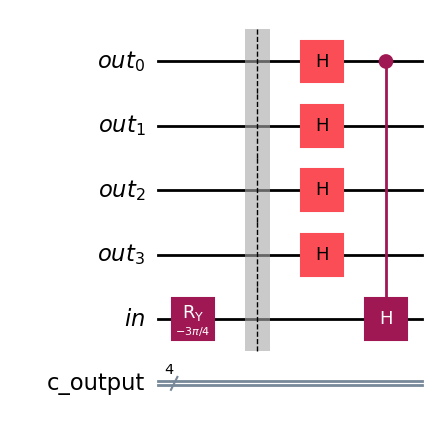

In [86]:
init(qc, q_input, -135)
#qc.x(4)
qc.barrier()
phase_est(qc, q_input, q_output, cont_u)
qc.draw(output='mpl')

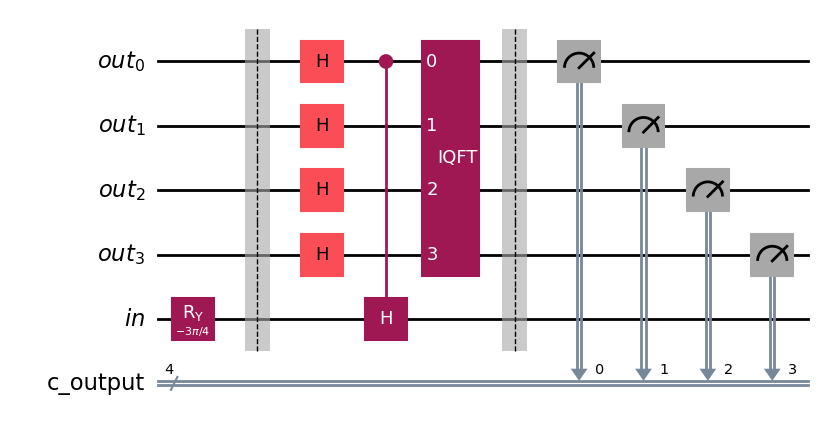

In [87]:
inv_qft(qc, q_output)
qc.barrier()
qc.measure(q_output, c_output)
qc.draw(output='mpl')

In [88]:
simulator = Aer.get_backend('qasm_simulator')

# Compilar y ensamblar el circuito cuántico
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2048)

result = job.result()
counts = result.get_counts(qc)
print(counts)


{'1000': 2048}


Vamos a usar phase estimation para el algoritmo de shor

In [58]:
precision = 4
a = 7
N = 15

In [59]:
def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    This is hard-coded for simplicity.
    """
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15")
    U = QuantumCircuit(4)
    if a in [2, 13]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    if a in [7, 8]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    if a in [4, 11]:
        U.swap(1, 3)
        U.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

In [60]:
def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)
    qc.barrier()
    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True,
            )
    qc.barrier()
    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )
    qc.measure(control_register, output_register)

    return qc

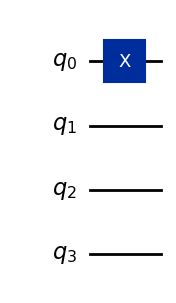

In [61]:
psi_prep = QuantumCircuit(4)
psi_prep.x(0)
psi_prep.draw(output='mpl')


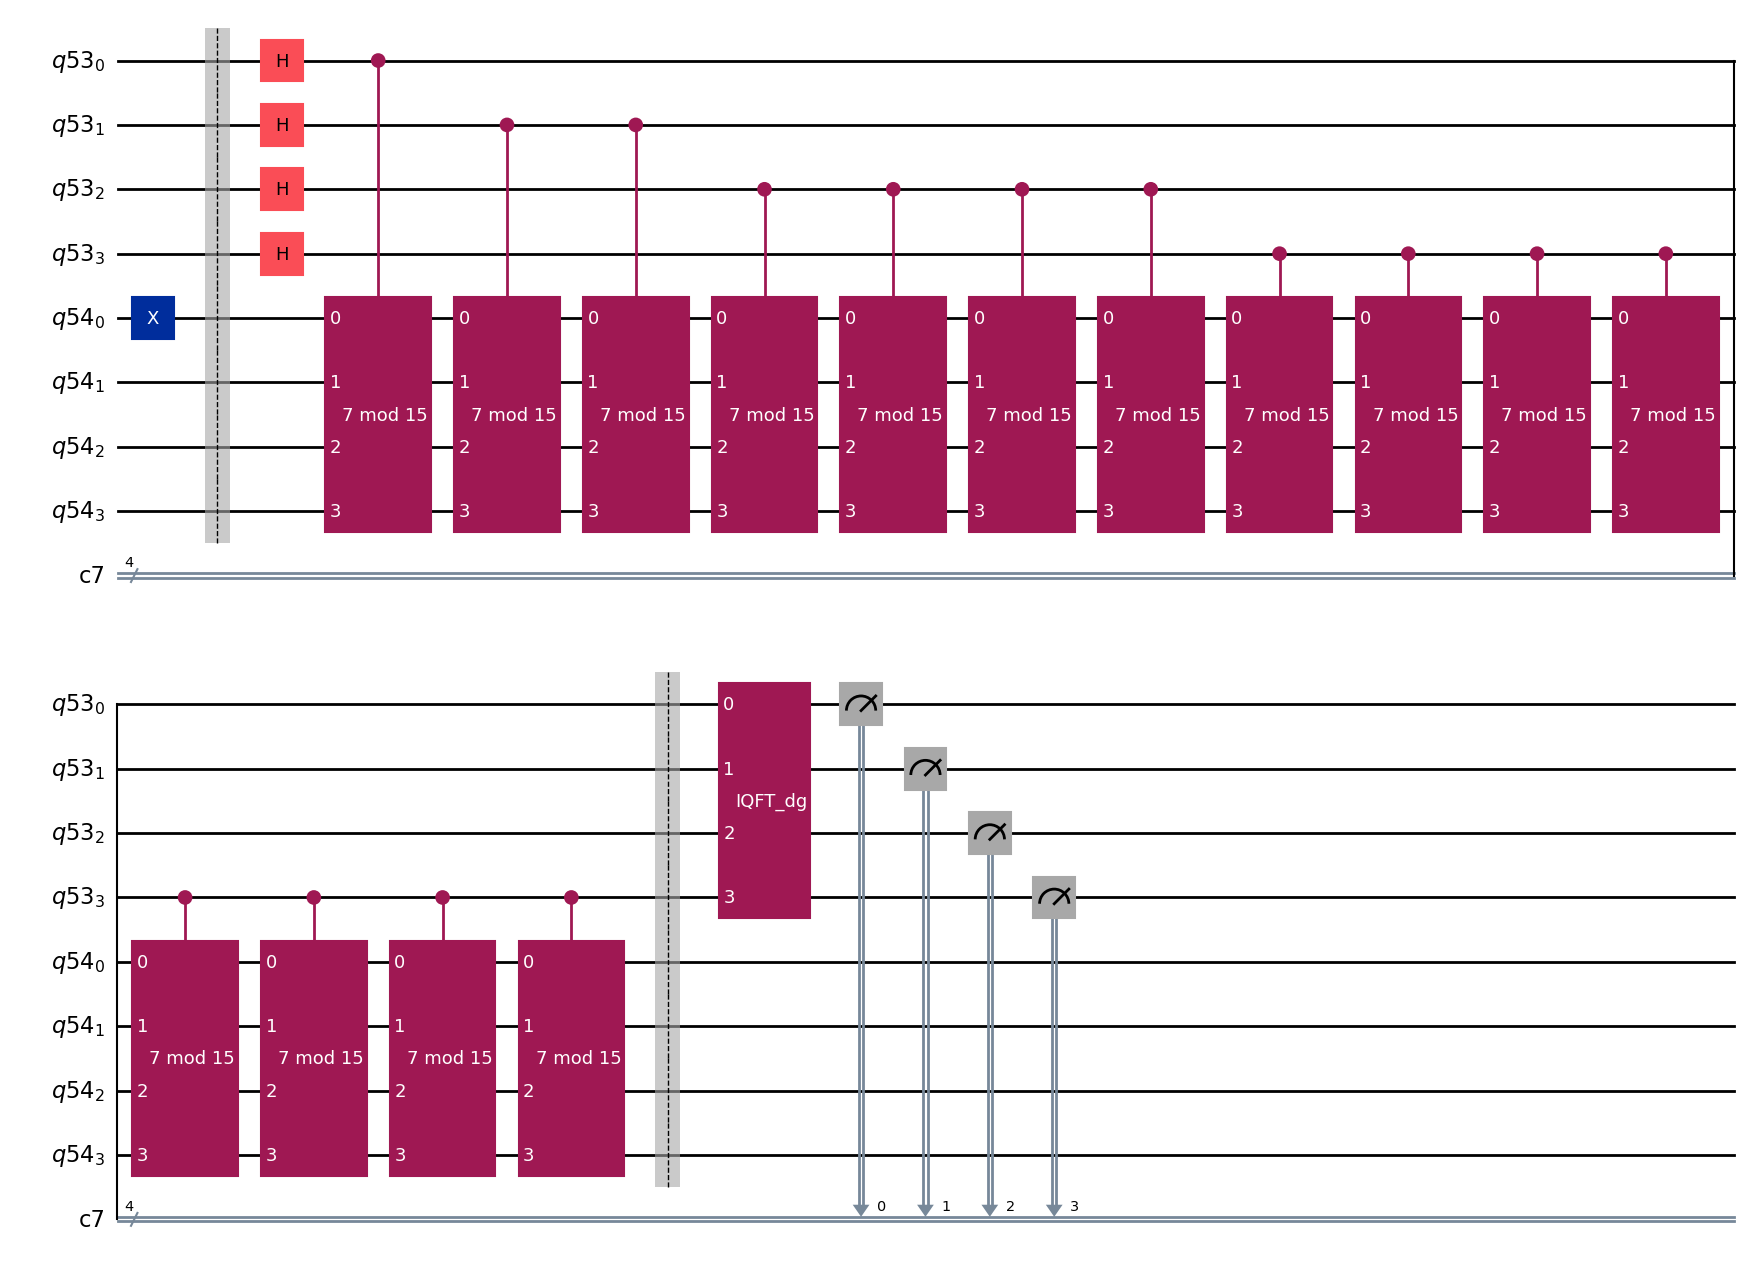

In [62]:
qc = phase_estimation( c_amod15(a), psi_prep, precision)
qc.draw(output='mpl')

In [63]:
# Descomposición del circuito
basis_gates = ['u1', 'u2', 'u3', 'cx', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg']
decomposed_qc = transpile(qc, basis_gates=basis_gates)
# Dibujar el circuito descomposto
decomposed_qc.draw('mpl', style="iqp")

In [64]:
from fractions import Fraction
from math import gcd

a = 7
N = 15
precision = 4

simulator = Aer.get_backend('qasm_simulator')

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")
    
    qc = phase_estimation(
        c_amod15(a),
        psi_prep,
        precision=precision
    )

    #print(qc)
    
    # Compilar y ensamblar el circuito cuántico
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts(qc).popitem()[0]
    entero = int(counts, 2)
    phase = entero / 2**precision

    print(f"phase= {phase}")
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(x^{r/2} - 1 , 15)
        guess = gcd(a ** (r // 2) - 1, N)
        if guess not in [1, N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Non-trivial factor found: {guess}")
            FACTOR_FOUND = True


Attempt 1
phase= 0.0

Attempt 2
phase= 0.5
Non-trivial factor found: 3


In [ ]:
frac = Fraction(phase).limit_denominator(N)
frac

In [ ]:
guess = gcd(a ** (r // 2) - 1, N)
guess

In [ ]:
N % guess